In [54]:
# imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pymongo

In [55]:
# Import de la data a partir de mangodb
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["scrapping_stackoverflow"]
collection = db["questions"]

# On verifie que la connexion est bien établie et on affiche les 5 premières lignes
data = pd.DataFrame(list(collection.find()))
data.head()

,_id,title,link,summary,tags,author,date
0,669a27de40bc84bedae0ecd6,how to use tags in text in shoutbox,https://stackoverflow.com/questions/78768395/h...,I want to have some kind of shoutbox with tags...,"[javascript, php, html, chat]",Krzysztof Stasiak,2024-07-19 08:44:26Z
1,669a27de40bc84bedae0ecd7,Running an API through a powershell script and...,https://stackoverflow.com/questions/78768394/r...,I am trying to run an API using a post method ...,"[powershell, api, tls1.2]",Goel Nathan,2024-07-19 08:44:16Z
2,669a27de40bc84bedae0ecd8,Why can't we add interactive sever on Login pa...,https://stackoverflow.com/questions/78768393/w...,I have Blazor server web app we use identity p...,"[javascript, .net, blazor, blazor-server-side]",janitha Chamaka,2024-07-19 08:44:15Z
3,669a27de40bc84bedae0ecd9,converting a custom MAkefile rule to CmakeList...,https://stackoverflow.com/questions/78768389/c...,I have a Makefile which passes a define to eac...,"[cmake, makefile]",danmcb,2024-07-19 08:43:28Z
4,669a27de40bc84bedae0ecda,Performance improvement: Azure Synapse Stored ...,https://stackoverflow.com/questions/78768388/p...,"Need suggestions on the stored procedure , it ...","[sql-server, stored-procedures, azure-synapse]",KKU,2024-07-19 08:43:19Z


In [56]:
# Suppression de la colonne id
data.drop(columns=['_id'], inplace=True)

In [57]:
# Extraction du premier mot des tags pour faciliter la visualisation
data['tag'] = data['tags'].apply(lambda x: x[0])

# On affiche les 5 premières lignes
data.head()

,title,link,summary,tags,author,date,tag
0,how to use tags in text in shoutbox,https://stackoverflow.com/questions/78768395/h...,I want to have some kind of shoutbox with tags...,"[javascript, php, html, chat]",Krzysztof Stasiak,2024-07-19 08:44:26Z,javascript
1,Running an API through a powershell script and...,https://stackoverflow.com/questions/78768394/r...,I am trying to run an API using a post method ...,"[powershell, api, tls1.2]",Goel Nathan,2024-07-19 08:44:16Z,powershell
2,Why can't we add interactive sever on Login pa...,https://stackoverflow.com/questions/78768393/w...,I have Blazor server web app we use identity p...,"[javascript, .net, blazor, blazor-server-side]",janitha Chamaka,2024-07-19 08:44:15Z,javascript
3,converting a custom MAkefile rule to CmakeList...,https://stackoverflow.com/questions/78768389/c...,I have a Makefile which passes a define to eac...,"[cmake, makefile]",danmcb,2024-07-19 08:43:28Z,cmake
4,Performance improvement: Azure Synapse Stored ...,https://stackoverflow.com/questions/78768388/p...,"Need suggestions on the stored procedure , it ...","[sql-server, stored-procedures, azure-synapse]",KKU,2024-07-19 08:43:19Z,sql-server


Ici on regroupe les tags en utilisant uniquement le premier mot. Cela nous permet de regrouper les langages qui sont partagés en différents tags afin d'avoir une vision plus globale des questions posées et à quel langage ces questions font référence.

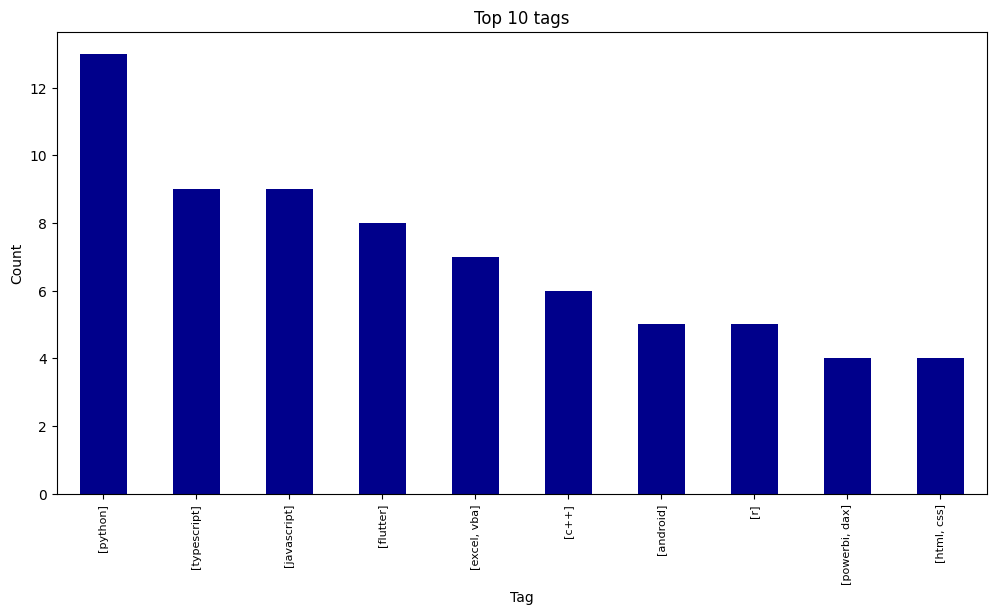

In [58]:
# Affichage en histogramme des 15 tags les plus fréquents
plt.figure(figsize=(12, 6))
data['tags'].value_counts().head(10).plot(kind='bar', color='darkblue')
plt.title('Top 10 tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.rc('xtick')
plt.show()

On peut voir que le tag qui revient le plus est le tag **javascript**. On retrouve egalement les tags comme **flutter** et **excel, vba** en 2eme position avec un nombre identique de tags.

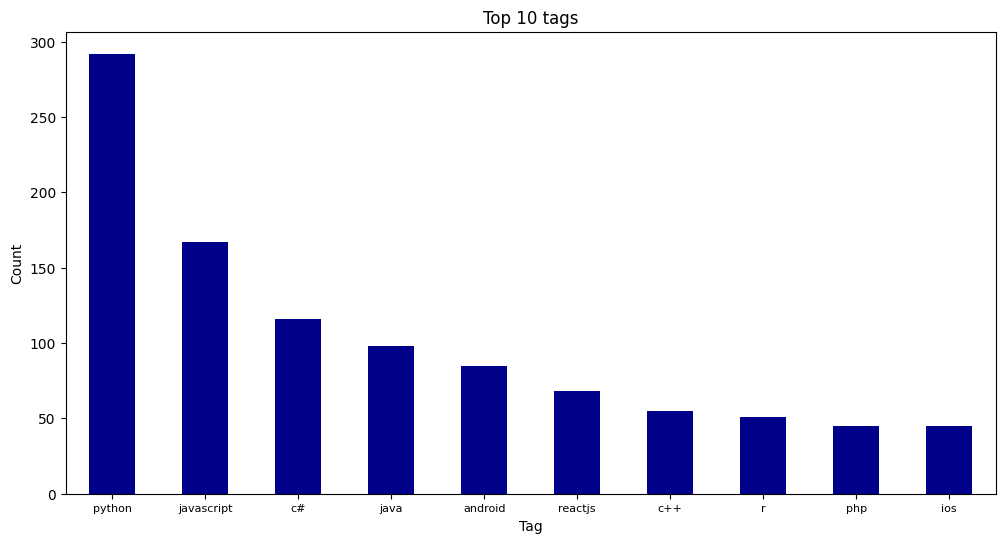

In [59]:
# Affichage en histogramme des 15 tags les plus fréquents
plt.figure(figsize=(12, 6))
data['tag'].value_counts().head(10).plot(kind='bar', color='darkblue')
plt.title('Top 10 tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.rc('xtick', labelsize=12)
plt.show()

Si on utilise la nouvelle colonne **tag** au lieu de la colonne tags, on visualize les tags les plus présents dans les questions et là on se rend compte que **python** est en première position et que **javascript** passe en deuxième position. **Excel / VBA** par contre n'est plus dans le top 10. 

In [ ]:
# Calcul d'une moyenne pour les tags



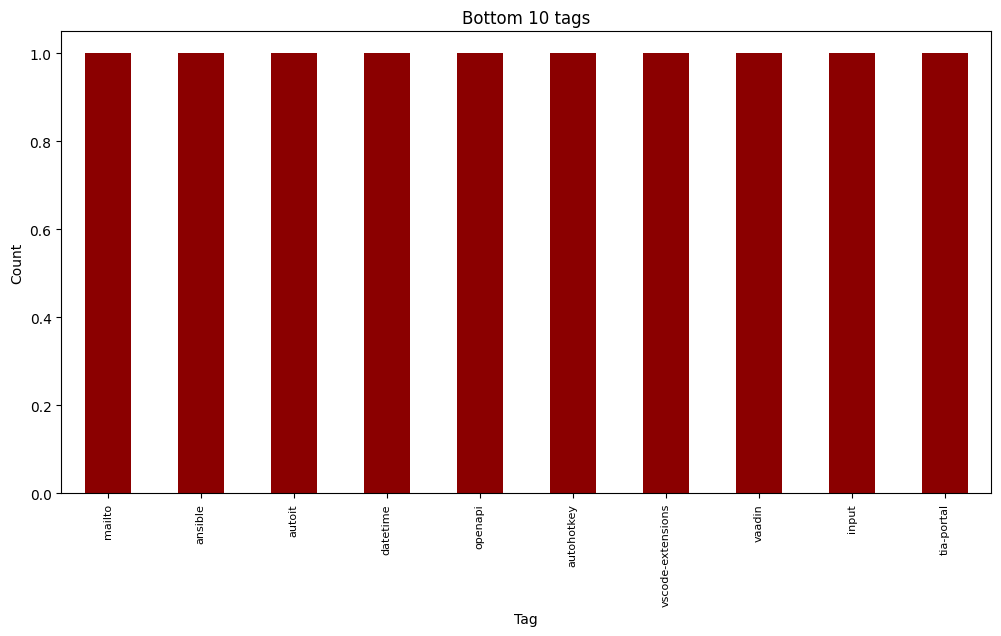

In [62]:
# Affichage en histogramme des 10 tags les moins fréquents
plt.figure(figsize=(12, 6))
data['tag'].value_counts().tail(10).plot(kind='bar', color='darkred')
plt.title('Bottom 10 tags')
plt.xlabel('Tag', fontsize=10)
plt.ylabel('Count')
plt.rc('xtick', labelsize=8)
plt.xticks(rotation=90)
plt.show()

Ici on peut voir les tags les moins utilisés pour les questions posées. On a utilisé la colonne tag afin d'avoir les résultats regroupés.

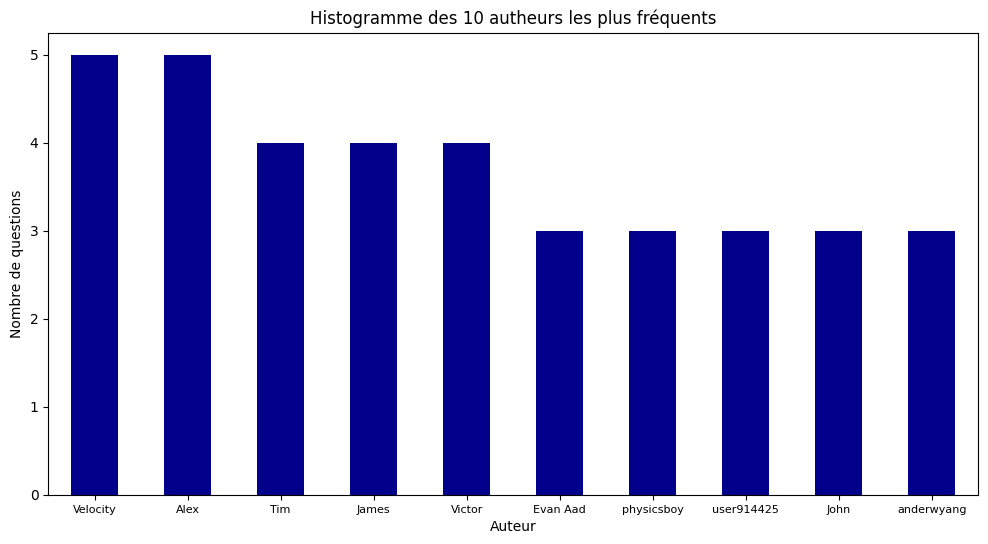

In [61]:
# Affichage des histogrammes des autheurs les plus fréquents

plt.figure(figsize=(12, 6))
data['author'].value_counts().head(10).plot(kind='bar', color='darkblue')
plt.title('Histogramme des 10 autheurs les plus fréquents')
plt.xlabel('Auteur')
plt.ylabel('Nombre de questions')
plt.xticks(rotation=0)
plt.show()